<a href="https://colab.research.google.com/github/dheemanthAthreya/6thSem-ML-Lab/blob/main/Lab_3/1BM22CS347_Lab3_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import math
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Logistic Regression (Binary Classification)

## Example


In [3]:
df = pd.read_csv("insurance_data.csv")

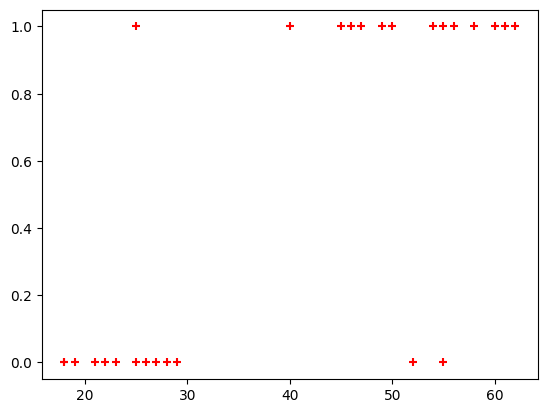

In [4]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9,random_state=10)
X_train.shape

(24, 1)

In [6]:
X_test

,age
7,60
5,56
18,19


In [8]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [10]:
X_test



,age
7,60
5,56
18,19


In [11]:
y_test

,bought_insurance
7,1
5,1
18,0


In [12]:
y_predicted = model.predict(X_test)
y_predicted

array([1, 1, 0])

In [13]:
model.score(X_test,y_test)

1.0

In [14]:
model.predict_proba(X_test)

array([[0.06470655, 0.93529345],
       [0.10327333, 0.89672667],
       [0.92775258, 0.07224742]])

In [15]:
y_predicted = model.predict([[60]])
y_predicted

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [16]:
model.coef_

array([[0.1274065]])

In [17]:
model.intercept_

array([-4.97339194])

In [18]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

def prediction_function(age):
   z = 0.127 * age - 4.973 # 0.12740563 ~ 0.0127 and -4.97335111 ~ -4.97
   y = sigmoid(z)
   return y


In [20]:
age = 35
prediction_function(age)

0.3709834769552775

## HR_comma_sep.csv

Null values in dataset:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64
Correlation with employee retention:
 left                      1.000000
time_spend_company        0.144822
average_montly_hours      0.071287
Department_hr             0.028249
number_project            0.023787
Department_technical      0.020076
Department_accounting     0.015201
Department_support        0.010700
Department_sales          0.009923
last_evaluation           0.006567
Department_marketing     -0.000859
salary                   -0.001294
Department_product_mng   -0.011029
Department_management    -0.046035
Department_RandD         -0.046596
promotion_last_5years    -0.061788
Work_accident            -0.154622
satisfaction_level       -0.388375
Name: left, dtype: float

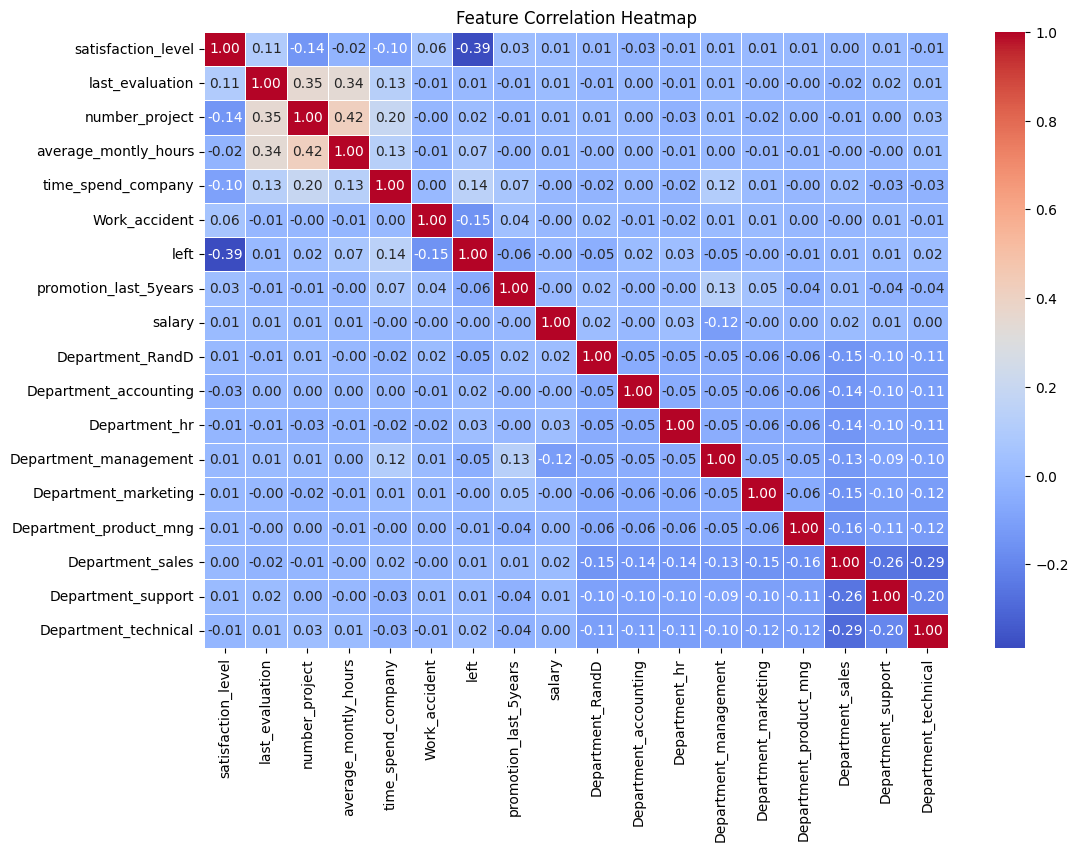

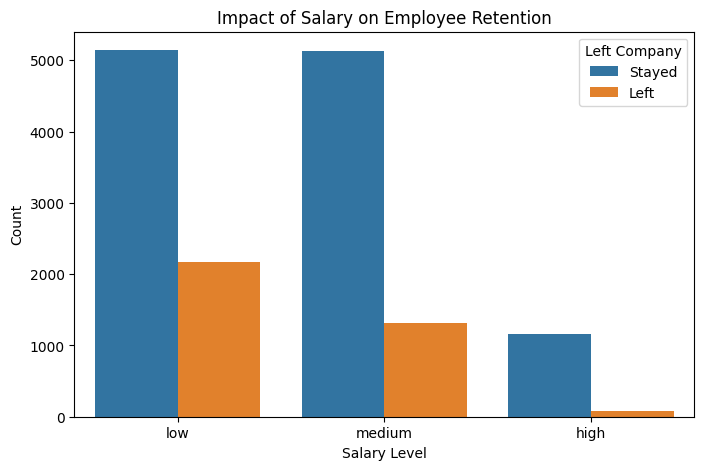

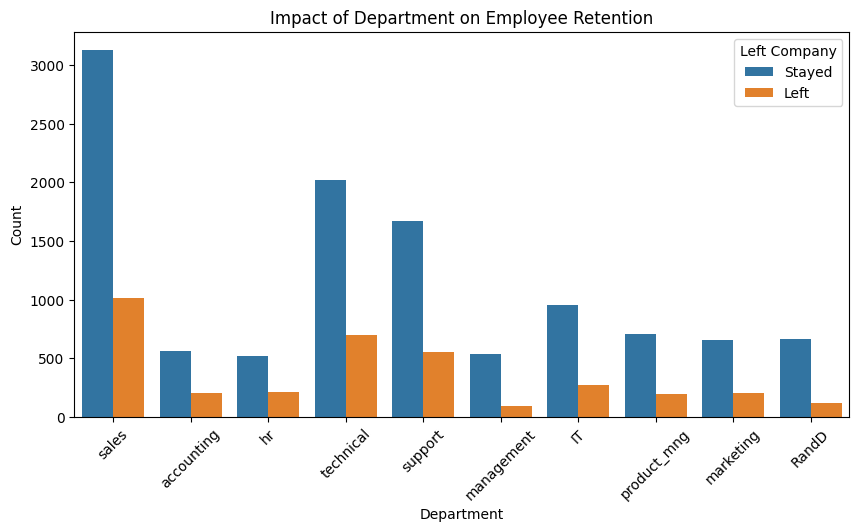

Model Accuracy: 0.76


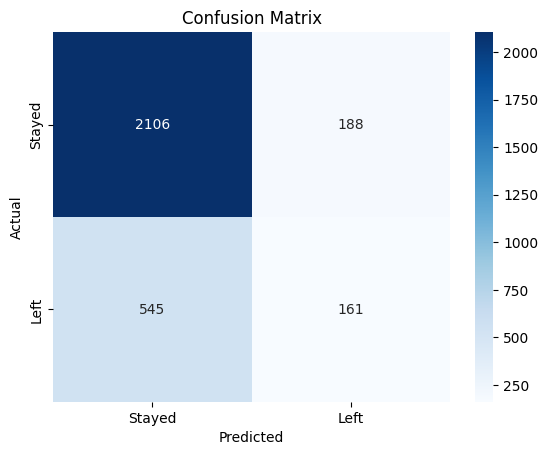

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.92      0.85      2294
           1       0.46      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.63      0.57      0.58      3000
weighted avg       0.72      0.76      0.72      3000

Regression Coefficients: [[-1.03899511  0.1204939  -0.37352703  0.24017633  0.32834265 -0.51734705
  -0.25982603  0.02200847]]
Intercept: [-1.51907223]


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
file_path = "HR_comma_sep.csv"
df = pd.read_csv(file_path)

# Check for null values
print("Null values in dataset:\n", df.isnull().sum())

# Convert categorical variables to numeric
df_encoded = df.copy()
df_encoded['salary'] = df_encoded['salary'].astype('category').cat.codes  # Encode salary as numeric
df_encoded = pd.get_dummies(df_encoded, columns=['Department'], drop_first=True)  # One-hot encode departments

# Compute correlation only for numerical columns
correlation_matrix = df_encoded.corr()

# Display correlation with employee retention
print("Correlation with employee retention:\n", correlation_matrix['left'].sort_values(ascending=False))

# Generate heatmap for correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Plot impact of employee salaries on retention
plt.figure(figsize=(8, 5))
sns.countplot(x='salary', hue='left', data=df, order=['low', 'medium', 'high'])
plt.title("Impact of Salary on Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Count")
plt.legend(title="Left Company", labels=["Stayed", "Left"])
plt.show()

# Plot correlation between department and employee retention
plt.figure(figsize=(10, 5))
sns.countplot(x='Department', hue='left', data=df)
plt.xticks(rotation=45)
plt.title("Impact of Department on Employee Retention")
plt.xlabel("Department")
plt.ylabel("Count")
plt.legend(title="Left Company", labels=["Stayed", "Left"])
plt.show()

# Encode categorical variables
le_salary = LabelEncoder()
df['salary'] = le_salary.fit_transform(df['salary'])  # low=0, medium=1, high=2

df = pd.get_dummies(df, columns=['Department'], drop_first=True)  # One-hot encode departments

# Select features based on EDA
selected_features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary']
X = df[selected_features]
y = df['left']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(max_iter=500, solver='lbfgs')
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display regression coefficients
print("Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


# Logistic Regression (Multiclass Classification)

## Example


In [22]:
iris =  pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
X=iris.drop('species',axis='columns')# Features (sepal length, sepal width, petal length, petal width)
y = iris.species

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
model = LogisticRegression(multi_class='multinomial')


In [26]:
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [27]:
y_pred = model.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)

In [31]:
print(f"Accuracy of the Multinomial Logistic Regression model on the test set: {accuracy:.2f}")

Accuracy of the Multinomial Logistic Regression model on the test set: 1.00


In [32]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)


In [33]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Setosa", "Versicolor", "Virginica"])


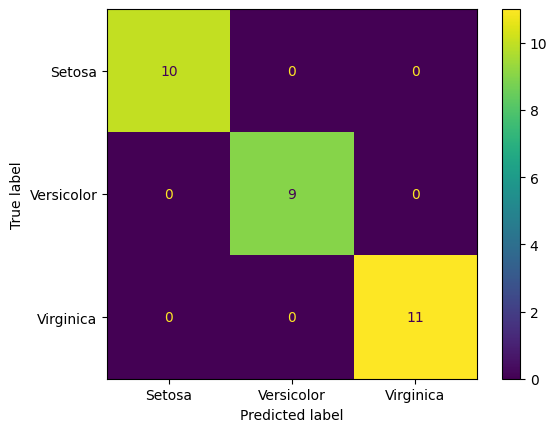

In [34]:
cm_display.plot()
plt.show()

## zoo dataset

Model Accuracy: 0.95


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


<Figure size 800x600 with 0 Axes>

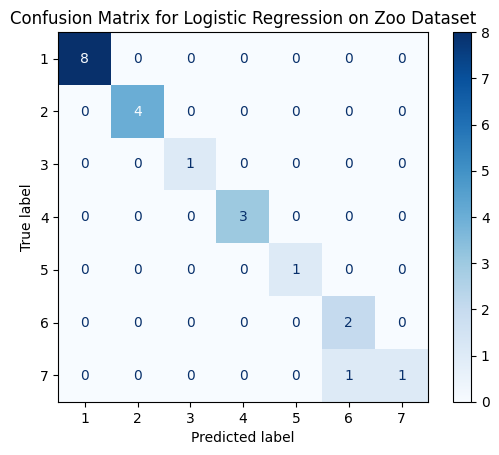

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load datasets
zoo_data_path = "zoo-data.csv"
zoo_class_type_path = "zoo-class-type.csv"

zoo_data = pd.read_csv(zoo_data_path)
zoo_class_type = pd.read_csv(zoo_class_type_path)

# Drop 'animal_name' as it is not useful for classification
zoo_data = zoo_data.drop(columns=['animal_name'])

# Features and target variable
X = zoo_data.drop(columns=['class_type'])
y = zoo_data['class_type']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y.unique()))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Logistic Regression on Zoo Dataset")
plt.show()
